<a href="https://colab.research.google.com/github/YuberHernany/prepara_conversatorio/blob/main/sequential_iris.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
  </a>


# Uso de API squential de Keras sobre el dataset iris

In [1]:
import tensorflow as ft
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

Se separan los datos para test

In [78]:
iris = load_iris()
X, y = iris.data, iris.target
X_full, X_test, y_full, y_test = train_test_split(X, y)
# print(X_full.shape, X_test.shape, y_full.shape, y_test.shape) # 38 datos para test

In [79]:
plt.style.use("dark_background")

def graficaDatos(X, y, labx='', laby=''):
    ax = plt.gca()
    ax.scatter(X[:, 0][y==0], X[:, 1][y==0], label="setosa", c='yellow')
    ax.scatter(X[:, 0][y==1], X[:, 1][y==1], label="versicolor", c='gray')
    ax.scatter(X[:, 0][y==2], X[:, 1][y==2], label="virginica", c='green')
    ax.set_xlabel(labx)
    ax.set_ylabel(laby)
    plt.legend(loc="lower right")

Se separan los datos para entrenar y para validar

In [80]:
X_valid, X_train = X_full[:22], X_full[22:]
y_valid, y_train = y_full[:22], y_full[22:]
print(X_valid.shape, X_train.shape)  # 22 instancias para validad y 90 para entrenar

(22, 4) (90, 4)


Graficamente los datos para entrenar y los datos para validar 

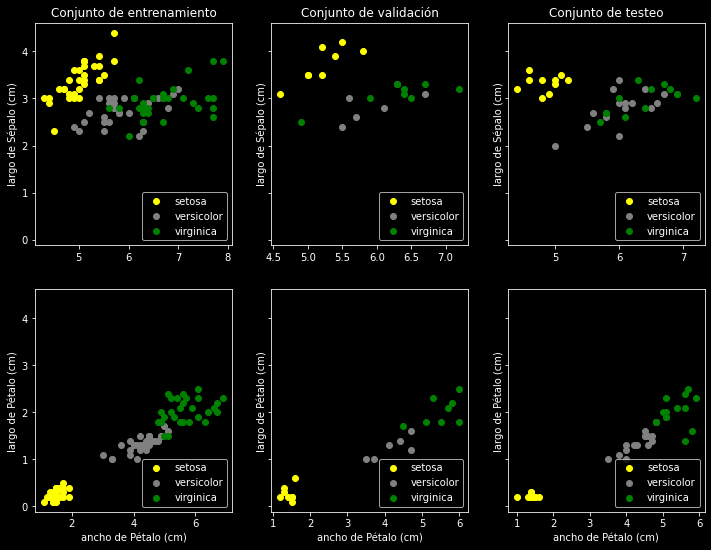

In [81]:
X_sep_train, X_pet_train = X_train[:, (0,1)], X_train[:, (2,3)]
X_sep_valid, X_pet_valid = X_valid[:, (0,1)], X_valid[:, (2,3)]

fig, axes = plt.subplots(2,3, figsize=(12,9), sharey=True)
plt.subplot(231)
ax = plt.gca()
graficaDatos(X_sep_train, y_train, laby="largo de Sépalo (cm)")
ax.set_title("Conjunto de entrenamiento")
plt.subplot(232)
ax = plt.gca()
graficaDatos(X_sep_valid, y_valid, laby="largo de Sépalo (cm)")
ax.set_title("Conjunto de validación")
plt.subplot(233)
ax = plt.gca()
graficaDatos(X_test[:, (0,1)], y_test, laby="largo de Sépalo (cm)")
ax.set_title("Conjunto de testeo")
plt.subplot(234)
ax = plt.gca()
graficaDatos(X_pet_train, y_train, labx="ancho de Pétalo (cm)", laby="largo de Pétalo (cm)")
# ax.set_title("Conjunto de entrenamiento")
plt.subplot(235)
ax = plt.gca()
graficaDatos(X_pet_valid, y_valid, labx="ancho de Pétalo (cm)", laby="largo de Pétalo (cm)")
# ax.set_title("Conjunto de validación")
plt.subplot(236)
ax = plt.gca()
graficaDatos(X_test[:, (2,3)], y_test, labx="ancho de Pétalo (cm)", laby="largo de Pétalo (cm)")
# ax.set_title("Conjunto de testeo")
plt.show()


In [85]:
# arquitectura de la red neuronal
model_cls_iris = keras.models.Sequential()
model_cls_iris.add(keras.layers.Flatten(input_shape=[1,4]))
model_cls_iris.add(keras.layers.Dense(4, activation="relu"))
model_cls_iris.add(keras.layers.Dense(4, activation="relu"))
model_cls_iris.add(keras.layers.Dense(3, activation="softmax"))

In [86]:
model_cls_iris.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 15        
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


In [87]:
# compilar
model_cls_iris.compile(loss="sparse_categorical_crossentropy",
                        optimizer="sgd",
                        metrics=["accuracy"])

In [89]:
# entrenar
history = model_cls_iris.fit(X_train, y_train, epochs=100,
                            validation_data=(X_valid, y_valid))

Epoch 1/100
3/3 [==============================] - 0s 100ms/step - loss: 0.5895 - accuracy: 0.7444 - val_loss: 0.5198 - val_accuracy: 0.8636
Epoch 2/100
3/3 [==============================] - 0s 102ms/step - loss: 0.5813 - accuracy: 0.7556 - val_loss: 0.5093 - val_accuracy: 0.8182
Epoch 3/100
3/3 [==============================] - 0s 77ms/step - loss: 0.5739 - accuracy: 0.8000 - val_loss: 0.5057 - val_accuracy: 0.8636
Epoch 4/100
3/3 [==============================] - 0s 109ms/step - loss: 0.5673 - accuracy: 0.8111 - val_loss: 0.4997 - val_accuracy: 0.8636
Epoch 5/100
3/3 [==============================] - 0s 78ms/step - loss: 0.5604 - accuracy: 0.8000 - val_loss: 0.4920 - val_accuracy: 0.8636
Epoch 6/100
3/3 [==============================] - 0s 143ms/step - loss: 0.5540 - accuracy: 0.8222 - val_loss: 0.4872 - val_accuracy: 0.9091
Epoch 7/100
3/3 [==============================] - 0s 118ms/step - loss: 0.5485 - accuracy: 0.8333 - val_loss: 0.4775 - val_accuracy: 0.9091
Epoch 8/100
3/3

Revisión gráfica del proceso

In [90]:
import pandas as pd
import matplotlib.pyplot as plt


In [94]:
pd.DataFrame(history.history) # tabla con loss y accuracy en entrenaiento y validación por cada época

,loss,accuracy,val_loss,val_accuracy
0,0.589537,0.744444,0.519767,0.863636
1,0.581293,0.755556,0.509298,0.818182
2,0.573904,0.800000,0.505705,0.863636
3,0.567299,0.811111,0.499696,0.863636
4,0.560431,0.800000,0.491956,0.863636
...,...,...,...,...
95,0.248341,0.966667,0.203480,1.000000
96,0.247665,0.966667,0.194090,1.000000
97,0.253780,0.966667,0.202589,1.000000
98,0.244495,0.966667,0.188108,1.000000


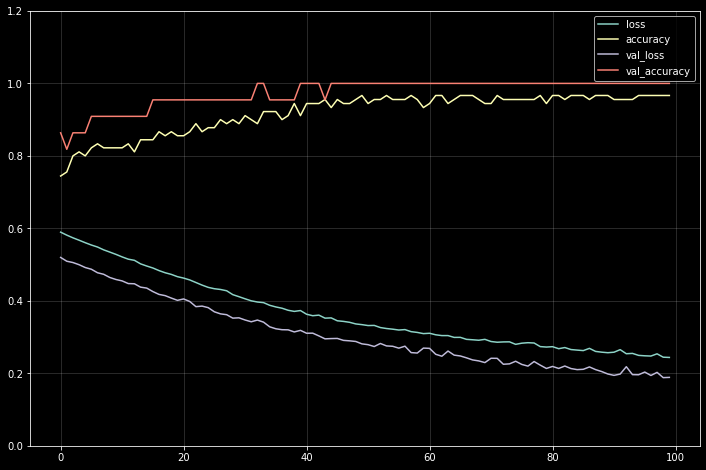

In [99]:
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True, alpha=0.2)
plt.gca().set_ylim(0,1.2)
plt.show()

In [100]:
#evaluar
model_cls_iris.evaluate(X_test, y_test)

2/2 [==============================] - 0s 42ms/step - loss: 0.2617 - accuracy: 0.9474


[0.2616625428199768, 0.9473684430122375]

EXPLORAR
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
- luego de entrenar

In [103]:
hidden1 = model_cls_iris.layers[1]
weights_hid1, biases_hid1 = hidden1.get_weights()

In [104]:
weights_hid1

array([[ 0.18748285, -0.5283582 , -0.02973652,  0.85354143],
       [-0.6428039 , -0.01248872, -0.5919133 ,  0.5798688 ],
       [ 0.23501788, -0.55488795,  1.2597299 , -0.06971786],
       [-0.6103816 , -0.729187  ,  0.80164784,  0.5725227 ]],
      dtype=float32)

In [105]:
biases_hid1

array([-0.00106897,  0.        , -0.025239  ,  0.13007727], dtype=float32)

In [106]:
hidden2 = model_cls_iris.layers[2]
weights_hid2, biases_hid2 = hidden2.get_weights()

In [107]:
weights_hid2

array([[-0.52561396, -0.32350656, -0.03669065,  0.39732176],
       [-0.5165304 ,  0.8325495 ,  0.49028474, -0.5834364 ],
       [ 0.7158539 , -1.1685785 ,  0.15004748, -0.83972853],
       [ 0.26367098,  0.9795954 , -0.6338912 , -0.22090596]],
      dtype=float32)

In [115]:
model_cls_iris.get_weights()

[array([[ 0.18748285, -0.5283582 , -0.02973652,  0.85354143],
        [-0.6428039 , -0.01248872, -0.5919133 ,  0.5798688 ],
        [ 0.23501788, -0.55488795,  1.2597299 , -0.06971786],
        [-0.6103816 , -0.729187  ,  0.80164784,  0.5725227 ]],
       dtype=float32),
 array([-0.00106897,  0.        , -0.025239  ,  0.13007727], dtype=float32),
 array([[-0.52561396, -0.32350656, -0.03669065,  0.39732176],
        [-0.5165304 ,  0.8325495 ,  0.49028474, -0.5834364 ],
        [ 0.7158539 , -1.1685785 ,  0.15004748, -0.83972853],
        [ 0.26367098,  0.9795954 , -0.6338912 , -0.22090596]],
       dtype=float32),
 array([-0.11573827,  0.2677926 ,  0.        ,  0.        ], dtype=float32),
 array([[-1.095228  , -0.23947686,  0.12334574],
        [ 1.1050411 ,  0.33571574, -0.90945375],
        [-0.8551362 , -0.41704887,  0.75033164],
        [ 0.42590463, -0.71803737,  0.6535765 ]], dtype=float32),
 array([-0.06042234,  0.24601811, -0.18559575], dtype=float32)]